# Dimensionality Reduction

In [4]:
import numpy as np

1. Projection
2. Manifold Learning

* PCA
* Kernel PCA
* LLE

## PCA

Random 3D dataset

In [5]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

PCA

In [6]:
#SVD
#centere to mean
X_centered = X - X.mean(axis = 0)
U,s,Vt = np.linalg.svd(X_centered)
pc1 = Vt.T[:,0]
pc2 = Vt.T[:,1]

projection

In [8]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

pca in sk learn

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
X2D = pca.fit_transform(X)

In [16]:
pcs = pca.components_.T
pcs

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

Explained Variance

In [17]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

Selecting No of Dimensions

In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [20]:
# manual
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1

#sklearn
pca = PCA(n_components= 0.95)
X_reduced = pca.fit_transform(X_train)

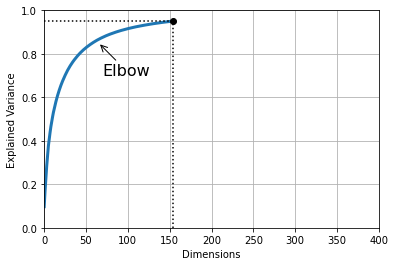

In [26]:
#plot
import matplotlib.pyplot as plt

exp_var = pca.explained_variance_ratio_
exp_var_cumsum = np.cumsum(exp_var)

plt.figure(figsize =(6,4))
plt.plot(exp_var_cumsum, linewidth = 3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)